# Taxonomic Matching Between Two Systems with NLP

Final Data Science Capstone
<br>
Colette Gabriel

## Table of Contents:
* [Natural Language Processing Functions](#nlp)
* [Visualization Functions](#viz)
* [Processing](#proc)

## Introduction to the Dataset  <a name="data"></a>
<br>
The dataset used in this project is a combination of data pulled from two different production systems in my current company. The code I've written runs in the Spyder environment and not in Jypter notebook, but for this capstone I've created two .csv files of anonymized sample data representing data from each of the systems.

Both data sysmtms contain information about products we sell. One system contains over 400,000 products and the other contains about 1.2 million products. The two separate systems are the result of a company merger, and the goal is to meaninfully combine this data into a third database system that is currently being built.

In [44]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import isnan
from wordcloud import WordCloud

# NLP libraries
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

# ML libraries
from sklearn import pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import roc_auc_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [22]:
sys1_df = pd.read_csv('c:/Users/xcxg109/Downloads/Sys1_CLEANING.csv')
sys2_df = pd.read_csv('c:/Users/xcxg109/Downloads/Sys2_CLEANING.csv')

print('System 1 file size = ', sys1_df.shape[0])
print('System 2 file size = ', sys2_df.shape[0])
pd.options.display.float_format = '{:.3f}'.format

System 1 file size =  4041
System 2 file size =  4031


In [4]:
sys1_df.head(5)

,Segment_ID,Segment_Name,Family_ID,Family_Name,Category_ID,Category_Name,Sys1_Attr_ID,Sys1_Attribute_Name,Sys1_Attribute_Definition,Sys1_Category_Specific_Definition,Sys1 Blue Path,Sys1 Attribute Sample Values,Sys1 ALL Values,alt_Sys1_name,Matching,Sys1_sku_count,Sys1-Sys2 Terminal Node Mapping,Sys2/Sys1 SKU Counts
0,1003,Cleaning,2007,Cleaning Chemicals,26994,Drain Cleaners and Maintainers,102079.000,Item,1-5 word short product description (e.g. Motor...,NaN,Cleaning > Cleaning Chemicals > Drain Cleaners...,Drain Maintainer; Liquid Drain Maintainer; Sep...,Drain Maintainer Liquid Grease Remover Drain M...,item,Grainger only,92.000,Drain Cleaners and Maintainers -- Drain & Garb...,31 / 92
1,1003,Cleaning,2007,Cleaning Chemicals,26994,Drain Cleaners and Maintainers,404305.000,Item - Drains and Maintainers,This attribute is intended to capture the gene...,NaN,Cleaning > Cleaning Chemicals > Drain Cleaners...,Drain Maintainer; Drain Opener; Septic Tank Tr...,Holding Tank Cleaner/Treatment Main Line Clean...,item - drains and maintainers,Grainger only,92.000,Drain Cleaners and Maintainers -- Drain & Garb...,31 / 92
2,1003,Cleaning,2007,Cleaning Chemicals,26994,Drain Cleaners and Maintainers,403466.000,Chemical Series,This attribute is intended to capture the seri...,NaN,Cleaning > Cleaning Chemicals > Drain Cleaners...,No Series; Disposer Care(R),No Series No Series No Series No Series No Ser...,chemical series,Grainger only,92.000,Drain Cleaners and Maintainers -- Drain & Garb...,31 / 92
3,1003,Cleaning,2007,Cleaning Chemicals,26994,Drain Cleaners and Maintainers,403464.000,Cleaner Form,This attribute is intended to capture the form...,NaN,Cleaning > Cleaning Chemicals > Drain Cleaners...,Liquid; Gel; Pacs; Powder; Compressed Gas; Cry...,Liquid Liquid Liquid Liquid Liquid Liquid Liqu...,cleaner form,Grainger only,92.000,Drain Cleaners and Maintainers -- Drain & Garb...,31 / 92
4,1003,Cleaning,2007,Cleaning Chemicals,26994,Drain Cleaners and Maintainers,128284.000,VOC Content,This attribute is intended to capture the VOC ...,NaN,Cleaning > Cleaning Chemicals > Drain Cleaners...,0%; 0; 1008g/L; 5.0%; VOC Free,0% 0% 0% 0% 0% 0% 0% 0% VOC Free 0% 0% 0% 0% 0...,voc content,Grainger only,92.000,Drain Cleaners and Maintainers -- Drain & Garb...,31 / 92


In [5]:
sys1_df['Category_ID'].unique()

array([26994, 27077, 23373,  3044,  3040,  3041, 23385, 26407, 25115,
       23371,  3037,  3056,  3045, 23379, 27442, 13366, 30033,  4288,
       29955, 29956,  3053, 30018], dtype=int64)

In [6]:
sys2_df.head(5)

,Sys2_Node_ID,Sys2_Category_ID,Sys2_Category_Name,Sys2_Node_Name,Sys2_PIM_Path,Sys2_Attr_ID,Sys2_Attribute_Name,Sys2_Attribute_Definition,Sys2 Attribute Sample Values,Sys2 ALL Values,alt_Sys2_name,Matching,Sys2_sku_count,Sys1-Sys2 Terminal Node Mapping,Sys2/Sys1 SKU Counts
0,2026.000,1155.000,Facility Cleaning,Drain & Garbage Disposal Chemicals,Facility Cleaning > Cleaning Supplies > Cleani...,nan,NaN,NaN,NaN,NaN,NaN,Grainger only,31.000,Drain Cleaners and Maintainers -- Drain & Garb...,31 / 92
1,2026.000,1155.000,Facility Cleaning,Drain & Garbage Disposal Chemicals,Facility Cleaning > Cleaning Supplies > Cleani...,nan,NaN,NaN,NaN,NaN,NaN,Grainger only,31.000,Drain Cleaners and Maintainers -- Drain & Garb...,31 / 92
2,2026.000,1155.000,Facility Cleaning,Drain & Garbage Disposal Chemicals,Facility Cleaning > Cleaning Supplies > Cleani...,nan,NaN,NaN,NaN,NaN,NaN,Grainger only,31.000,Drain Cleaners and Maintainers -- Drain & Garb...,31 / 92
3,2026.000,1155.000,Facility Cleaning,Drain & Garbage Disposal Chemicals,Facility Cleaning > Cleaning Supplies > Cleani...,nan,NaN,NaN,NaN,NaN,NaN,Grainger only,31.000,Drain Cleaners and Maintainers -- Drain & Garb...,31 / 92
4,2026.000,1155.000,Facility Cleaning,Drain & Garbage Disposal Chemicals,Facility Cleaning > Cleaning Supplies > Cleani...,nan,NaN,NaN,NaN,NaN,NaN,Grainger only,31.000,Drain Cleaners and Maintainers -- Drain & Garb...,31 / 92


In [7]:
sys2_df['Sys2_Node_ID'].unique()

array([ 2026., 10908.,  2027.,  2019.,  2006.,  2040.,  1849.,  2035.,
        2033.,  2007.,  2029.,  2036.,  2030.,  2044.,  2023., 13339.,
        2024.,  2008.,  2042.,  2010.,    nan,  2046.,  2509.,  1962.,
        2038.,  2011.,  1993.,  2045.,  1992.,  2047.,  2048.,  2021.,
        2009., 13340.,  6005.,  2051.,  2052.,  2507.,  2050.,  2049.,
        5158.,  2039.,  5163.,  2041.])

In [8]:
def cat_filter(df, category, cat_filter):
    cat_filter = df.loc[df[category]== cat_filter]
    return cat_filter

## Natural Language Processing Functions <a name="nlp"></a>

Working with text is messy, so before we can feed it into machine learning algorthims we need to clean it up and shape into into mathematical notations that the model can work with.

Step 1. For every node in both systems, we'll create a separate text corpus:
    - Each attribute within a node becomes a separate document
    - The corpus of an attribute is a combination of the attribute's name, it's definition in the system, and all of the values for all of the products in the node. A "combined" field is created so that we have a string of text to process.
               
>For example, node 29955 (system 1) has an attribute called "Cleaner Container Type". It's definition is "This attribute is intended to capture the specific container type that the degreaser or cleaning chemical is packaged in, e.g. Bottle, Dispenser, Drum, Jug, etc. A jug is a bottle with some form of a handle. Detergent pods come in a canister. If product is a kit with several container types, use the data value of Kit." Some of the values of products for this attribute are: "Aerosol Can", "Trigger Spray Bottle", "Jug", "Bottle", "Drum" "Non Aerosol Can", and "Pump Bottle".

Step 2. Processing the corpus: Assumption is that the data is aready in good shape as far as grammar and spelling since this is 
        used in a production environment. Additional steps would be taken for other types of text.
    - Tokenize the documents created in Step 1
    - Remove stop words and punctuation
    - Use lemmatization to get to the roots of words (makes processing more efficient by reducing unique words)
    
Step 3. Use CountVectorizer and TFIDFTransformer to create the TFIDF matrices for system 1 and 2 corpora. System 2 nodes 
        generally contain more attributes, so they are used as the basis for the transformer and then the system 1 corpora is 
        fit to the transfomer object.

Step 4. We perform latent semantantic analysis (LSA) on the tfidf matrices using Sklearn's TruncatedSVD and matrix 
        normalization modules to make model computation more efficient.

In [9]:
def get_words(text):  
    """Clean up the text by tokenizing, removing pucntuation and stop words, then lemmatize.
    Currently using Spacy libraries"""
    
    token_list = []
    words = []

    nlp = English()  #load Spacy English tokenizer
    
    doc = nlp(text)
    
    # Create list of word tokens and use Spacy for lemmatization
    for token in doc:
        token.lemma_
        token_list.append(token.text)
    
    for wd in token_list:
        txt = nlp.vocab[wd]
        if txt.is_punct == False:       #remove punctuation
            if txt.is_stop == False:    #remove stopwords from Spacy list
                words.append(wd.lower()) 
                
    return words

In [10]:
def sys1_corp(df, node):
    """Build a unique document corpus for every node in SYSTEM 1.
    Each attribute within the node is considered a document.
    The attribute's name and values become part of the corpus, as well as both of the attribute's definitions
    (one system-wide and the other specific to the node)."""
    
    corpus = dict()
    corp = []
    corp_all = []
    words = []
    clean_words = []

    #create a temp dataframe to filter for the speicific node
    temp_df = cat_filter(df, 'Category_ID', node)  
    temp_df = temp_df.dropna(axis=0, subset=['Sys1 ALL Values'])
    
    #list of attributes from the node
    attributes = temp_df['Sys1_Attribute_Name'].unique()
    
    #create a "combined" column that includes all values, attribute names, and attribute definitions to define the corpus
    cols = ['Sys1 ALL Values', 'Sys1_Attribute_Name', 'Sys1_Attribute_Definition', 'Sys1_Category_Specific_Definition']
    temp_df['combined'] = temp_df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    
    #treat each attribute as a separate document and build a corpus    
    for att in attributes:
        corpus[att] = dict()
        #create a second temp dataframe filtered at the attribute level
        temp2_df = cat_filter(temp_df, 'Sys1_Attribute_Name', att)
        temp2_df = temp2_df.drop_duplicates(subset=['Sys1_Attribute_Name'])
        
        #create a document out of each attribute (combo of name, definitions, and values)
        doc = temp2_df['combined'].str.cat(sep=' ')
        
        #process doc into tokens, remove punctuation and stopwords, lemmatize, and remove 'nans'
        words = get_words(doc)
        clean_words = [x for x in words if str(x) != 'nan']
        
        if len(clean_words) > 0:
            corp.append(clean_words)
            c = ' '.join(clean_words)
            corp_all.append(c)
            
    return corp_all

In [11]:
def sys2_corp(df, node):
    """Build a unique document corpus for every node in SYSTEM 2.
    Each attribute within the node is considered a document.
    The attribute's name and values become part of the corpus, as well the attribute's definition."""
    
    corpus = dict()
    corp = []
    corp_all = []
    words = []
    clean_words = []
    
    #create temp dataframe filters for each node
    temp_df = cat_filter(df, 'Sys2_Node_ID', node)  
    temp_df = temp_df.dropna(axis=0, subset=['Sys2 ALL Values'])
    
    #list of attributes from the node
    attributes = temp_df['Sys2_Attribute_Name'].unique()
    
    #create a "combined" column that includes all values, attribute names, and attribute definitions to define the corpus
    cols = ['Sys2 ALL Values', 'Sys2_Attribute_Name', 'Sys2_Attribute_Definition']
    temp_df['combined'] = temp_df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    
    #treat each attribute as a separate document and build a corpus
    for att in attributes:
        corpus[att] = dict()
        #create a second temp dataframe filtered at the attribute level
        temp2_df = cat_filter(temp_df, 'Sys2_Attribute_Name', att)
        temp2_df = temp2_df.drop_duplicates(subset=['Sys2_Attribute_Name'])
        
        #create a document out of each attribute (combo of name, definitions, and values)
        doc = temp2_df['combined'].str.cat(sep=' ')
        
        #process doc into tokens, remove punctuation and stopwords, lemmatize, and remove 'nans'
        words = get_words(doc)
        clean_words = [x for x in words if str(x) != 'nan']
        
        if len(clean_words) > 0:
            corpus[att] = clean_words
            corp.append(clean_words)
            c = ' '.join(clean_words)
            corp_all.append(c)

        return corp_all

In [12]:
def attribute_name_match(sys1_df, sys2_df, sys1_nodes, sys2_nodes):
    """Build a dictionary for each system 1 and system 2 node that contains the cleaned up corpus for that node."""
    
    sys1_corp_all = dict()
    sys2_corp_all = dict()
    
    #build the corpus dictionary (unique for each node)
    for node in sys2_nodes:
        print('System 2 node = ', node)

        #store cleaned corpus for each node in dictionary for future comparision and remove any empty
        sys2_corp_all[node] = sys2_corp(sys2_df, node)

    for node in sys1_nodes:
        print('System 1 node = ', node)
        
        #store cleaned corpus for each node in dictionary for future comparision and remove any empty
        sys1_corp_all[node] = sys1_corp(sys1_df, node)

    return sys1_corp_all, sys2_corp_all

In [20]:
count_vect = CountVectorizer(ngram_range=[1,3], lowercase=False)
transformer = TfidfTransformer()

def tfidf_vect(sys1_corp_all, sys2_corp_all, sys1_nodes, sys2_nodes):
    """Create tf-idf vectors and cosine similarity matrix for each node in systems 1 and 2.
    System 2 nodes typically contain more attributes and data than system 1 nodes, so these became the basis
    for the TfidfTransformer object. This object is then used to fit the system 1 corpus data."""
    
    counts_sys1 = dict()
    sys1_cos_sim = dict()
    sys1_tfidf = dict()
    sys1_doc_count = dict()

    counts_sys2 = dict()
    sys2_tfidf = dict()
    sys2_cos_sim = dict()
    sys2_doc_count = dict()
 
    for node2 in sys2_nodes:
        #create term frequency for the node
        counts_sys2[node2] = count_vect.fit_transform(sys2_corp_all[node2])
        print('Sys2 Node {} word counts = {}'.format(node2, counts_sys2[node2].shape))
        
        sys2_tfidf[node2] = transformer.fit_transform(counts_sys2[node2]) #.toarray()
        sys2_cos_sim[node2] = cosine_similarity(sys2_tfidf[node2])

        for node1 in sys1_nodes:
            #using the tfidf counts from each node in System 2, create a tfifd matrix for every node in System 1
            counts_sys1[node1] = count_vect.transform(sys1_corp_all[node1])
            num_docs = counts_sys1[node1].shape
            sys1_doc_count[node1] = num_docs[0]
            print('Sys 1 Node {} word counts = {}'.format(node1, num_docs))

            sys1_tfidf[node1] = transformer.fit_transform(counts_sys1[node1])
            sys1_cos_sim[node1] = cosine_similarity(sys1_tfidf[node1])

    print('\n\nTesting succesful vectorization using first attribute from Sys1[final node] as example attribute:')
    test_att = sys1_corp_all[node1][0]
    print('\nAttribute test for {} = {}'.format(node1, test_att))
    bow_att = count_vect.transform([test_att])
    print('\nWord counts =', bow_att)
    print(bow_att.shape)
        
    return sys1_tfidf, sys1_cos_sim, sys1_doc_count, sys2_tfidf, sys2_cos_sim

## Visualization Functions <a name = 'vis'></a>

While visualization has not been important in the production environment, I have included a few here to demonstrate how I can use them when creating presentations for other stake holders. I've included a look at choosing optimal clusters, using t-SNE to show document simarlarites, and created a word cloud.

In [14]:
def opt_clusters(tfidf, max_k, node):
    """Create diagram showing the opimal number of clusters for a given node."""

    iters = range(2, max_k+1, 2)
    
    sse = []  #error of sum squares for cluster counts
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(tfidf).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    
    title = node,' SSE by Cluster Center Plot'
    ax.set_title(title)

In [74]:
def show_clusters(tfidf, labels, node):
    """use t-SNE to visualize the corpus"""
    
    max_label = max(labels)
    max_items = np.random.choice(range(tfidf.shape[0]), size=9, replace=False)
    
    pca = PCA(n_components=2).fit_transform(tfidf[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=5).fit_transform(tfidf[max_items,:].todense()))
        
    idx = np.random.choice(range(pca.shape[0]), size=9, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 1)
    
    ax.scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    title = node,' TSNE Cluster'
    ax.set_title(title)

In [16]:
def top_words(tfidf, clusters, labels, n_terms):
    df = pd.DataFrame(tfidf.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

## Processing <a name = 'proc'></a>

In [33]:
#create a list of unique nodes for each system and then start passing them to the data building functions above
sys1_nodes = sys1_df['Category_ID'].unique()
sys2_nodes = sys2_df['Sys2_Node_ID'].unique()

#make sure no blanks are in the files
sys1_nodes = [x for x in sys1_nodes if (isnan(x) == False)]
sys2_nodes = [x for x in sys2_nodes if (isnan(x) == False)]

print('System 1 nodes to process = ', sys1_nodes)
print('System 2 nodes to process = ', sys2_nodes)

sys1_corp_all, sys2_corp_all = attribute_name_match(sys1_df, sys2_df, sys1_nodes, sys2_nodes)

System 1 nodes to process =  [26994, 27077, 23373, 3044, 3040, 3041, 23385, 26407, 25115, 23371, 3037, 3056, 3045, 23379, 27442, 13366, 30033, 4288, 29955, 29956, 3053, 30018]
System 2 nodes to process =  [1849.0, 1962.0, 1992.0, 1993.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2019.0, 2021.0, 2023.0, 2024.0, 2026.0, 2027.0, 2029.0, 2030.0, 2033.0, 2035.0, 2036.0, 2038.0, 2039.0, 2040.0, 2041.0, 2042.0, 2044.0, 2045.0, 2046.0, 2047.0, 2048.0, 2049.0, 2050.0, 2051.0, 2052.0, 2507.0, 2509.0, 5158.0, 5163.0, 6005.0, 10908.0, 13339.0, 13340.0]
System 2 node =  1849.0
System 2 node =  1962.0
System 2 node =  1992.0
System 2 node =  1993.0
System 2 node =  2006.0
System 2 node =  2007.0
System 2 node =  2008.0
System 2 node =  2009.0
System 2 node =  2010.0
System 2 node =  2011.0
System 2 node =  2019.0
System 2 node =  2021.0
System 2 node =  2023.0
System 2 node =  2024.0
System 2 node =  2026.0
System 2 node =  2027.0
System 2 node =  2029.0
System 2 node =  2030.0
System 2 node =

In [34]:
#create the tfifd vectors and cosine similarity matrices for each system

sys1_tfidf, sys1_cos_sim, sys1_doc_count, sys2_tfidf, sys2_cos_sim = \
                tfidf_vect(sys1_corp_all, sys2_corp_all, sys1_nodes, sys2_nodes)

Sys2 Node 1849.0 word counts = (1, 55)
Sys 1 Node 26994 word counts = (20, 55)
Sys 1 Node 27077 word counts = (20, 55)
Sys 1 Node 23373 word counts = (19, 55)
Sys 1 Node 3044 word counts = (22, 55)
Sys 1 Node 3040 word counts = (22, 55)
Sys 1 Node 3041 word counts = (24, 55)
Sys 1 Node 23385 word counts = (18, 55)
Sys 1 Node 26407 word counts = (6, 55)
Sys 1 Node 25115 word counts = (9, 55)
Sys 1 Node 23371 word counts = (17, 55)
Sys 1 Node 3037 word counts = (21, 55)
Sys 1 Node 3056 word counts = (20, 55)
Sys 1 Node 3045 word counts = (18, 55)
Sys 1 Node 23379 word counts = (16, 55)
Sys 1 Node 27442 word counts = (9, 55)
Sys 1 Node 13366 word counts = (22, 55)
Sys 1 Node 30033 word counts = (20, 55)
Sys 1 Node 4288 word counts = (22, 55)
Sys 1 Node 29955 word counts = (18, 55)
Sys 1 Node 29956 word counts = (18, 55)
Sys 1 Node 3053 word counts = (19, 55)
Sys 1 Node 30018 word counts = (17, 55)
Sys2 Node 1962.0 word counts = (1, 18)
Sys 1 Node 26994 word counts = (20, 18)
Sys 1 Node 27

In [35]:
model = pipeline.Pipeline([
    ('SVD', TruncatedSVD(n_components=5, n_iter=7, random_state=42)),
    ('normalize', Normalizer(copy=False)),
    ('knn', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
                               leaf_size=30, p=2, metric='jaccard', metric_params=None, n_jobs=1)) 
])

In [36]:
for node in sys1_nodes:
    temp_df = cat_filter(sys1_df, 'Category_ID', node)

    X = sys1_cos_sim[node]
    print('x = ', X)
    y = temp_df['Sys1_Attribute_Name'].unique()
    y = [att for att in y if str(att) != 'nan']
    
    results = model.fit(X, y)

x =  [[1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters


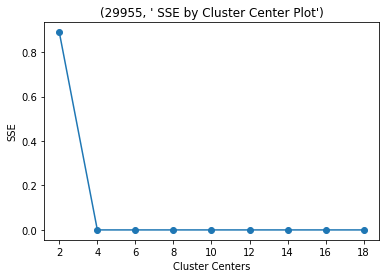

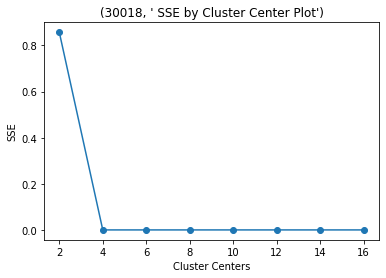

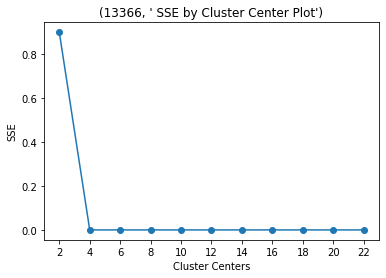

In [38]:
sample_nodes = [29955, 30018, 13366]

for node in sample_nodes:
    opt_clusters(sys1_tfidf[node], sys1_doc_count[node], node)

In [58]:
for node1 in sys1_nodes:
    clusters = MiniBatchKMeans(n_clusters=sys1_doc_count[node1], init_size=1024, batch_size=2048, 
                               random_state=20).fit_predict(sys1_tfidf[node1])

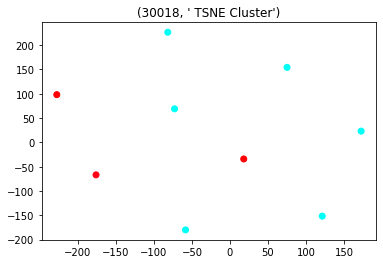

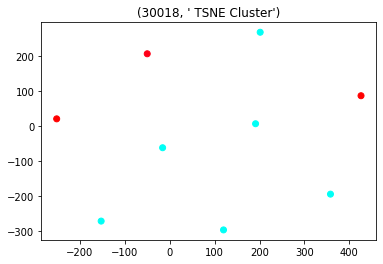

In [85]:
sample_nodes = [27442, 30018]

for node in sample_nodes:
    show_clusters(sys1_tfidf[27442], clusters, node1) 

In [102]:
for node in sys1_nodes:
    top_words(sys1_tfidf[node1], clusters, count_vect.get_feature_names(), 5)


Cluster 0
color product,product,yellow,yellow color,yellow color color

Cluster 1
color product,yellow,yellow color,yellow color color,product

Cluster 2
yellow,yellow color,yellow color color,product,color

Cluster 0
color product,product,yellow,yellow color,yellow color color

Cluster 1
color product,yellow,yellow color,yellow color color,product

Cluster 2
yellow,yellow color,yellow color color,product,color

Cluster 0
color product,product,yellow,yellow color,yellow color color

Cluster 1
color product,yellow,yellow color,yellow color color,product

Cluster 2
yellow,yellow color,yellow color color,product,color

Cluster 0
color product,product,yellow,yellow color,yellow color color

Cluster 1
color product,yellow,yellow color,yellow color color,product

Cluster 2
yellow,yellow color,yellow color color,product,color

Cluster 0
color product,product,yellow,yellow color,yellow color color

Cluster 1
color product,yellow,yellow color,yellow color color,product

Cluster 2
yellow,yellow